In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [13]:
df = pd.read_csv('nba_games_stats.csv')

In [14]:
df.shape

(9840, 41)

In [15]:
df.describe()

,Unnamed: 0,Game,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,...,9840.00000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,11960.157012,41.500000,103.652337,103.652337,38.602439,84.902439,0.455689,9.126829,25.623679,0.354321,...,17.32063,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537
std,18654.867508,23.670804,12.188043,12.188043,5.029992,7.130043,0.054711,3.598084,7.102501,0.097782,...,6.00262,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611
min,1.000000,1.000000,64.000000,64.000000,19.000000,60.000000,0.271000,0.000000,4.000000,0.000000,...,1.00000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000
25%,2537.750000,21.000000,95.000000,95.000000,35.000000,80.000000,0.418000,7.000000,21.000000,0.290000,...,13.00000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,5141.500000,41.500000,103.000000,103.000000,38.000000,85.000000,0.455000,9.000000,25.000000,0.353000,...,17.00000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000
75%,7715.250000,62.000000,112.000000,112.000000,42.000000,89.000000,0.494000,11.000000,30.000000,0.419000,...,21.00000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000
max,82119.000000,82.000000,149.000000,149.000000,58.000000,129.000000,0.684000,25.000000,61.000000,0.750000,...,44.00000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000


In [33]:
df.tail()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
9835,78119,WAS,78,2018-04-03,Away,HOU,L,104,120,38,...,18,27,0.667,10,46,26,13,3,9,14
9836,79119,WAS,79,2018-04-05,Away,CLE,L,115,119,47,...,22,28,0.786,5,35,26,10,3,16,14
9837,80119,WAS,80,2018-04-06,Home,ATL,L,97,103,35,...,16,23,0.696,7,50,24,5,5,18,22
9838,81124,WAS,81,2018-04-10,Home,BOS,W,113,101,41,...,22,27,0.815,13,44,22,14,1,16,18
9839,82119,WAS,82,2018-04-11,Away,ORL,L,92,101,33,...,22,27,0.815,6,42,20,6,7,16,27


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 41 columns):
Unnamed: 0                  9840 non-null int64
Team                        9840 non-null object
Game                        9840 non-null int64
Date                        9840 non-null object
Home                        9840 non-null object
Opponent                    9840 non-null object
WINorLOSS                   9840 non-null object
TeamPoints                  9840 non-null int64
OpponentPoints              9840 non-null int64
FieldGoals                  9840 non-null int64
FieldGoalsAttempted         9840 non-null int64
FieldGoals.                 9840 non-null float64
X3PointShots                9840 non-null int64
X3PointShotsAttempted       9840 non-null int64
X3PointShots.               9840 non-null float64
FreeThrows                  9840 non-null int64
FreeThrowsAttempted         9840 non-null int64
FreeThrows.                 9840 non-null float64
OffRebounds       

In [18]:
df.columns

Index(['Unnamed: 0', 'Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS',
       'TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.',
       'FreeThrows', 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
       'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'TotalFouls', 'Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls'],
      dtype='object')

In [21]:
df.corr()

,Unnamed: 0,Game,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
Unnamed: 0,1.000000,0.324239,0.109969,0.095388,0.120479,0.092450,0.064266,0.116695,0.159976,0.011902,...,-0.030122,-0.044625,0.030407,-0.047162,-0.004159,0.045921,-0.012058,-0.001177,-0.018346,-0.042104
Game,0.324239,1.000000,0.059389,0.061245,0.078181,0.058137,0.044019,0.044623,0.052515,0.011959,...,-0.035976,-0.035012,-0.001151,0.002942,0.019189,0.084962,-0.007983,-0.016545,-0.081390,-0.091161
TeamPoints,0.109969,0.059389,1.000000,0.360526,0.836203,0.284428,0.710187,0.518022,0.265727,0.477539,...,0.196832,0.192497,0.029329,0.017356,-0.277404,0.116507,-0.091221,-0.153516,0.038266,0.217472
OpponentPoints,0.095388,0.061245,0.360526,1.000000,0.269846,0.278018,0.098300,0.138392,0.158751,0.034548,...,0.318523,0.267833,0.175700,-0.011585,0.093312,0.574607,0.102418,0.056991,-0.115901,0.151177
FieldGoals,0.120479,0.078181,0.836203,0.269846,1.000000,0.441729,0.777024,0.329092,0.109583,0.363237,...,0.113287,0.105879,0.024164,0.005993,-0.261143,0.104001,-0.103220,-0.142266,0.036841,-0.133546
FieldGoalsAttempted,0.092450,0.058137,0.284428,0.278018,0.441729,1.000000,-0.216425,0.091678,0.263961,-0.136795,...,0.136452,0.138041,0.017233,-0.044799,0.320054,0.155268,-0.175984,0.258940,0.134820,-0.136791
FieldGoals.,0.064266,0.044019,0.710187,0.098300,0.777024,-0.216425,1.000000,0.293077,-0.066197,0.493585,...,0.029185,0.020658,0.013527,0.038295,-0.506287,0.003510,0.009620,-0.333857,-0.054332,-0.047338
X3PointShots,0.116695,0.044623,0.518022,0.138392,0.329092,0.091678,0.293077,1.000000,0.747013,0.685878,...,0.042949,0.040671,0.004444,-0.032134,-0.096056,0.043603,-0.008035,-0.128773,-0.035222,-0.101793
X3PointShotsAttempted,0.159976,0.052515,0.265727,0.158751,0.109583,0.263961,-0.066197,0.747013,1.000000,0.068394,...,0.053237,0.051995,0.008472,-0.054321,0.123637,0.075047,0.001993,-0.083209,0.029536,-0.071186
X3PointShots.,0.011902,0.011959,0.477539,0.034548,0.363237,-0.136795,0.493585,0.685878,0.068394,1.000000,...,0.013225,0.011773,-0.002838,0.011654,-0.262272,-0.020319,-0.011480,-0.107660,-0.073106,-0.074101


## Data Cleaning

In [29]:
#dropping opponent stats as I want to base my model on one team's stats
dft = df.drop(['Opp.FieldGoals', 'Opp.FieldGoalsAttempted',
       'Opp.FieldGoals.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted',
       'Opp.3PointShots.', 'Opp.FreeThrows', 'Opp.FreeThrowsAttempted',
       'Opp.FreeThrows.', 'Opp.OffRebounds', 'Opp.TotalRebounds',
       'Opp.Assists', 'Opp.Steals', 'Opp.Blocks', 'Opp.Turnovers',
       'Opp.TotalFouls'], axis = 1)

In [45]:
dft.head()

,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,...,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls
0,ATL,1,2014-10-29,Away,TOR,L,102,40,80,0.500,...,9,17,0.529,10,42,26,6,8,17,24
1,ATL,2,2014-11-01,Home,IND,W,102,35,69,0.507,...,25,33,0.758,3,37,26,10,6,12,20
2,ATL,3,2014-11-05,Away,SAS,L,92,38,92,0.413,...,8,11,0.727,10,37,26,14,5,13,25
3,ATL,4,2014-11-07,Away,CHO,L,119,43,93,0.462,...,20,26,0.769,7,38,28,8,3,19,33
4,ATL,5,2014-11-08,Home,NYK,W,103,33,81,0.407,...,28,36,0.778,12,41,18,10,5,8,17


In [42]:
dft = dft.drop(['Unnamed: 0', 'OpponentPoints'], axis=1)

In [43]:
dft.corr()

,Game,TeamPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls
Game,1.000000,0.059389,0.078181,0.058137,0.044019,0.044623,0.052515,0.011959,-0.037187,-0.036595,-0.000459,0.002806,0.017693,0.082710,-0.009256,-0.017147,-0.080715,-0.089735
TeamPoints,0.059389,1.000000,0.836203,0.284428,0.710187,0.518022,0.265727,0.477539,0.318523,0.267833,0.175700,-0.011585,0.093312,0.574607,0.102418,0.056991,-0.115901,0.151177
FieldGoals,0.078181,0.836203,1.000000,0.441729,0.777024,0.329092,0.109583,0.363237,-0.175325,-0.185503,0.004876,-0.000923,0.080150,0.637564,0.097681,0.062316,-0.151886,0.051371
FieldGoalsAttempted,0.058137,0.284428,0.441729,1.000000,-0.216425,0.091678,0.263961,-0.136795,-0.217743,-0.217224,-0.036973,0.509138,0.424753,0.196857,0.121444,0.037162,-0.276904,0.074338
FieldGoals.,0.044019,0.710187,0.777024,-0.216425,1.000000,0.293077,-0.066197,0.493585,-0.035912,-0.047040,0.030727,-0.353501,-0.206529,0.554593,0.020817,0.041642,0.027613,0.006092
X3PointShots,0.044623,0.518022,0.329092,0.091678,0.293077,1.000000,0.747013,0.685878,-0.099134,-0.115349,0.027792,-0.123974,-0.013439,0.419289,0.008089,-0.002103,-0.005752,0.033058
X3PointShotsAttempted,0.052515,0.265727,0.109583,0.263961,-0.066197,0.747013,1.000000,0.068394,-0.091881,-0.099366,0.007242,0.016708,0.090278,0.226847,0.046612,-0.005608,-0.012005,0.047430
X3PointShots.,0.011959,0.477539,0.363237,-0.136795,0.493585,0.685878,0.068394,1.000000,-0.050268,-0.066249,0.032668,-0.201343,-0.115364,0.374811,-0.029048,0.000760,0.005081,0.005355
FreeThrows,-0.037187,0.318523,-0.175325,-0.217743,-0.035912,-0.099134,-0.091881,-0.050268,1.000000,0.923855,0.331921,0.052336,0.063195,-0.153130,0.039400,0.012540,0.022667,0.201047
FreeThrowsAttempted,-0.036595,0.267833,-0.185503,-0.217224,-0.047040,-0.115349,-0.099366,-0.066249,0.923855,1.000000,-0.029283,0.092457,0.091154,-0.166925,0.051204,0.015715,0.027632,0.213832


In [38]:
#looking at unique team names as I will be merging with another DF(using different team names) later
dft.Team.unique()

array(['ATL', 'BOS', 'BRK', 'CHO', 'CHI', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
       'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS',
       'TOR', 'UTA', 'WAS'], dtype=object)

In [48]:
#Creating dummy variable for home/away
dft = pd.get_dummies(dft, prefix = ['Home'], columns = ['Home'], drop_first=True)

In [49]:
dft.head()

,Team,Game,Date,Opponent,WINorLOSS,TeamPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,...,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Home_Home
0,ATL,1,2014-10-29,TOR,L,102,40,80,0.500,13,...,17,0.529,10,42,26,6,8,17,24,0
1,ATL,2,2014-11-01,IND,W,102,35,69,0.507,7,...,33,0.758,3,37,26,10,6,12,20,1
2,ATL,3,2014-11-05,SAS,L,92,38,92,0.413,8,...,11,0.727,10,37,26,14,5,13,25,0
3,ATL,4,2014-11-07,CHO,L,119,43,93,0.462,13,...,26,0.769,7,38,28,8,3,19,33,0
4,ATL,5,2014-11-08,NYK,W,103,33,81,0.407,9,...,36,0.778,12,41,18,10,5,8,17,1


In [50]:
#creating dataframe without categorical data to make initial model
imdf = dft.drop(['Team', 'Game', 'Date', 'Opponent'], axis=1)

In [51]:
imdf.head()

,WINorLOSS,TeamPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Home_Home
0,L,102,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,0
1,W,102,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,1
2,L,92,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,0
3,L,119,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,0
4,W,103,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,1


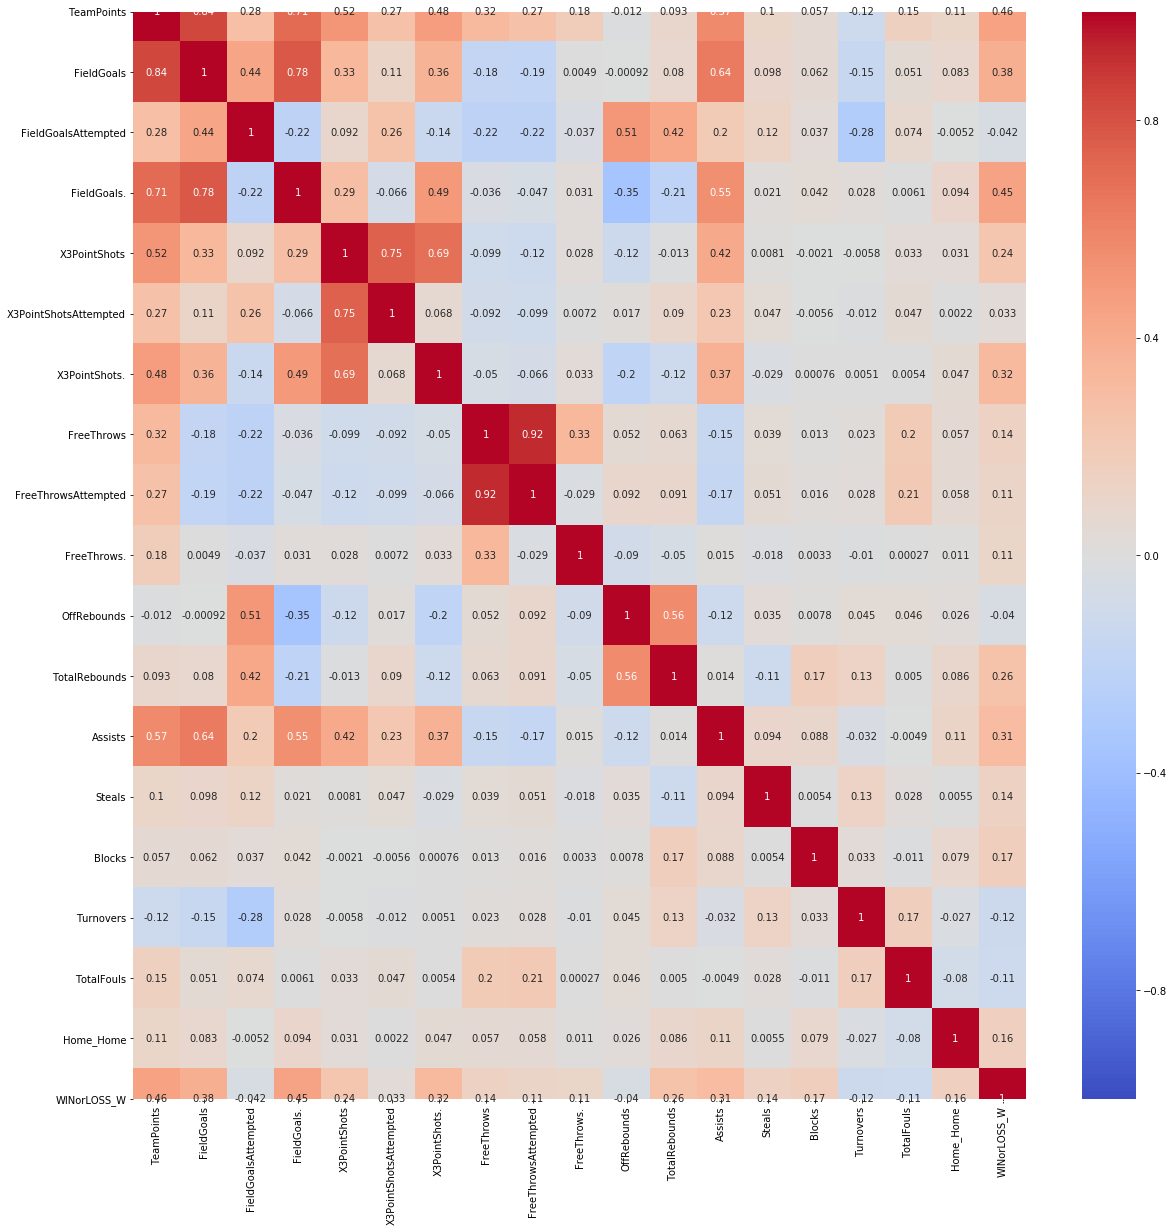

In [62]:
#plotting heat map of correlation for initial model df
plt.figure(figsize=(20,20))
sns.heatmap(imdf.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [57]:
#creating dummy variable for WINorLOSS which is target variable.
imdf = pd.get_dummies(imdf, prefix = ['WINorLOSS'], columns = ['WINorLOSS'], drop_first=True)

In [58]:
imdf.head()

,TeamPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Home_Home,WINorLOSS_W
0,102,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,0,0
1,102,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,1,1
2,92,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,0,0
3,119,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,0,0
4,103,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c4c647780>,
      dtype=object)

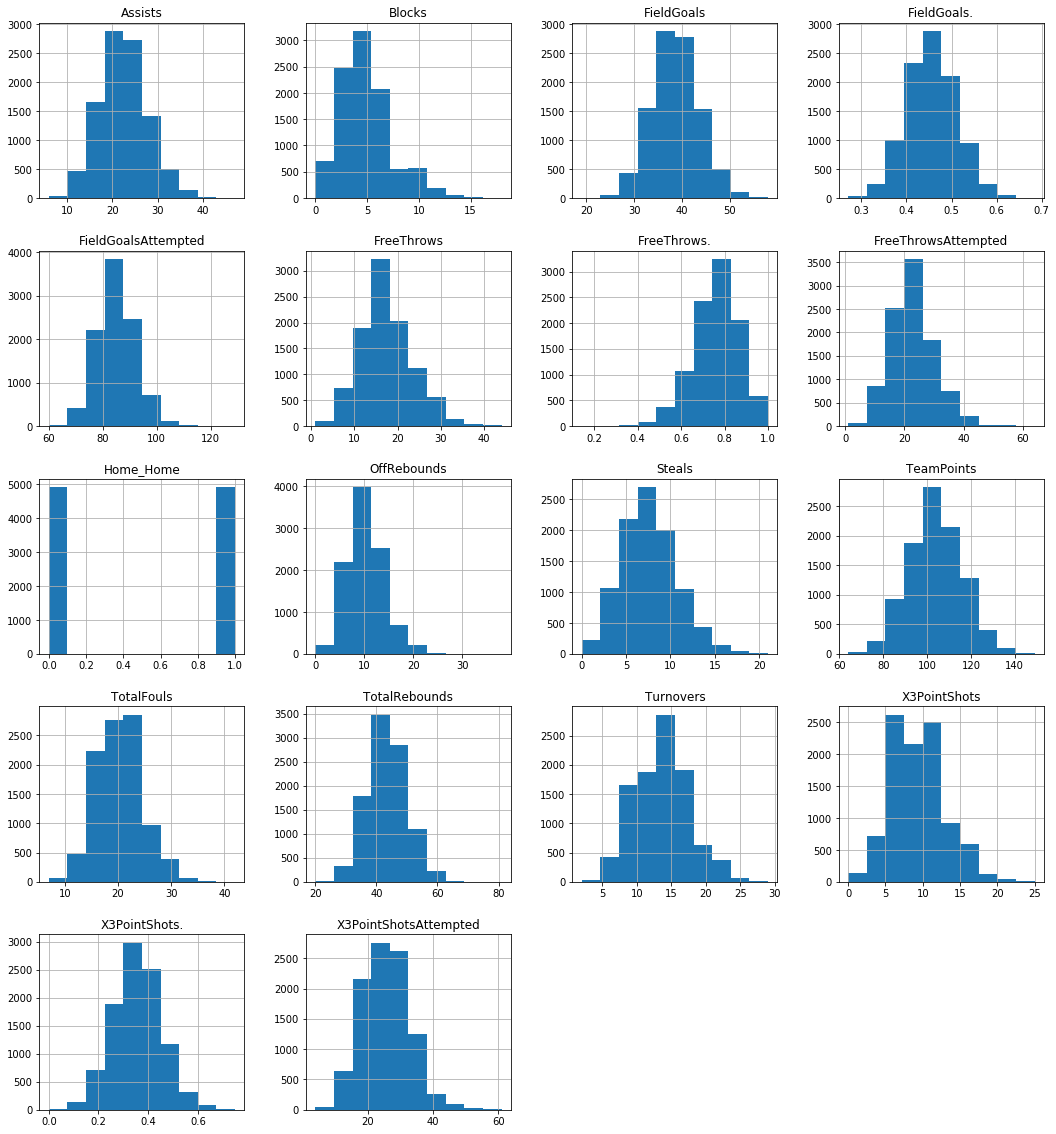

In [75]:
#checking distributions of all remaining features
feat = imdf.iloc[:, 0:18]
feat.hist(figsize=(18, 20))

In [59]:
#setting up variables for initial modeling
y = imdf['WINorLOSS_W']
X = imdf.drop(columns=['WINorLOSS_W'], axis=1)